In [1]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

In [2]:
x = torch.FloatTensor(range(5)).unsqueeze(1)
y = 2 * x + torch.rand(5, 1)

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1, 1, bias=True)

    def forward(self, x):
        return self.fc(x)

In [3]:
model = LinearRegression()
learning_rate = 1e-3
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [4]:
loss_stack = []
for epoch in range(1001):
    optimizer.zero_grad()

    y_hat = model(x)
    loss = criterion(y_hat, y)
    loss.backward()
    optimizer.step()
    loss_stack.append(loss.item())
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: loss = {loss.item()}")

Epoch 0: loss = 40.563262939453125
Epoch 100: loss = 2.7917542457580566
Epoch 200: loss = 0.2457379549741745
Epoch 300: loss = 0.07052283734083176
Epoch 400: loss = 0.055276017636060715
Epoch 500: loss = 0.05118237063288689
Epoch 600: loss = 0.04818446561694145
Epoch 700: loss = 0.04556679725646973
Epoch 800: loss = 0.04324665665626526
Epoch 900: loss = 0.04118780419230461
Epoch 1000: loss = 0.0393606536090374


C:\Users\jwn63\AppData\Local\Temp\ipykernel_6892\1327975293.py:12: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('ground truth', 'prediction')


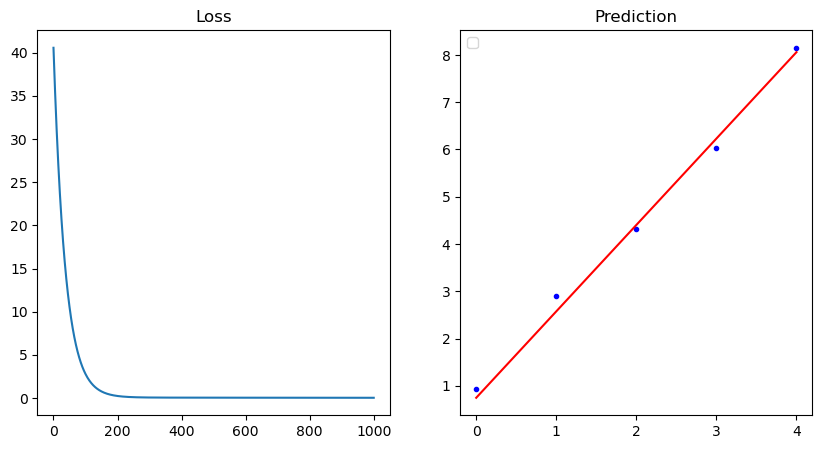

In [5]:
with torch.no_grad():
    y_hat = model(x)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_stack)
plt.title("Loss")

plt.subplot(1, 2, 2)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, '-r')
plt.legend('ground truth', 'prediction')
plt.title("Prediction")
plt.show()
